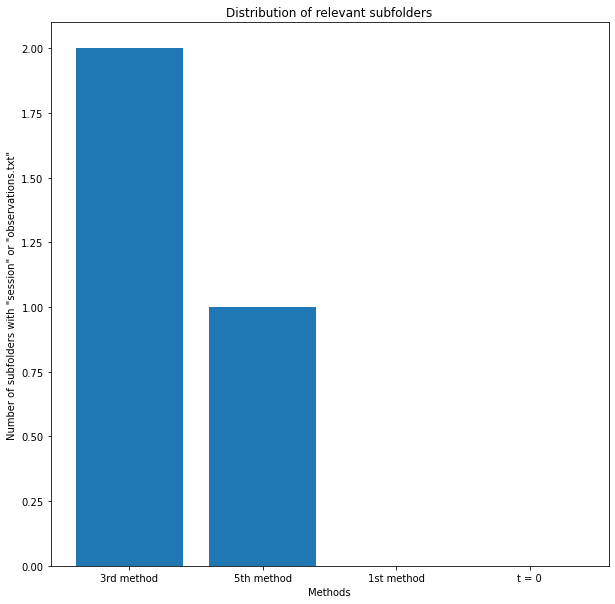

In [5]:
import os
import matplotlib.pyplot as plt

# Define the base directory path
base_dir = 'GPT-4'

# Fetch the subfolders (methods)
methods = [name for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]

counts = []

# Iterate over methods
for method in methods:
    method_path = os.path.join(base_dir, method)
    count = 0
    # Iterate over subfolders of a method
    for subdir in os.listdir(method_path):
        subdir_path = os.path.join(method_path, subdir)
        # If subdir is a directory
        if os.path.isdir(subdir_path):
            # If "session" is part of the subfolder name
            if "session" in subdir:
                count += 1
            # If it contains a file named "observations.txt"
            elif "observations.txt" in os.listdir(subdir_path):
                count += 1
    counts.append(count)

plt.figure(figsize=(10, 10))
# Plotting
plt.bar(methods, counts)
plt.xlabel('Methods')
plt.ylabel('Number of subfolders with "session" or "observations.txt"')
plt.title('Distribution of relevant subfolders')
plt.show()


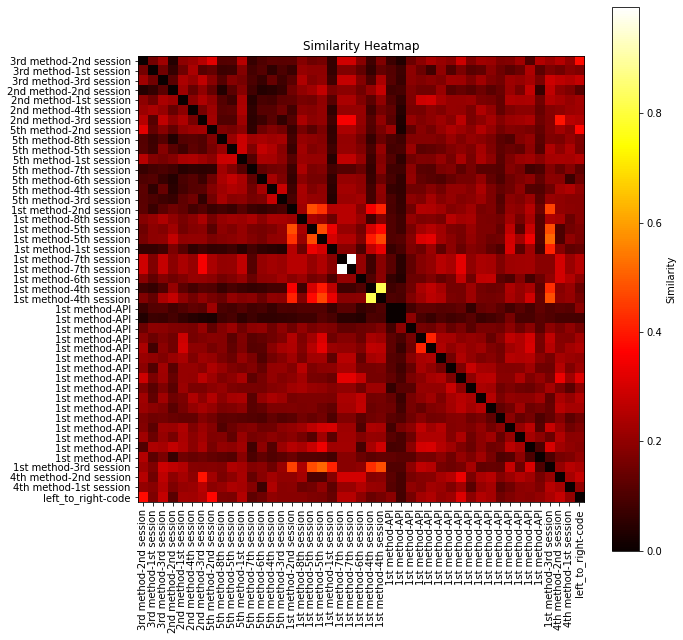

In [4]:
import os
import difflib
import numpy as np
import matplotlib.pyplot as plt

root_dir = 'GPT-3.5'

# Get list of all .py files and their reduced names
py_files = []
reduced_file_names = []
for foldername, subfolders, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.py'):
            filepath = os.path.join(foldername, filename)
            py_files.append(filepath)
            
            # Split the file path and keep only the parts you need
            path_parts = filepath.split(os.path.sep)
            reduced_filepath = "-".join(path_parts[1:3])  # adjust indices as needed
            reduced_file_names.append(reduced_filepath)

# Store contents of each file
file_contents = {}

for py_file in py_files:
    with open(py_file, 'r') as f:
        file_contents[py_file] = f.readlines()

# Create a 2D list to store the similarity ratios
similarity_matrix = np.zeros((len(py_files), len(py_files)))

# Compare each file to every other file
for i in range(len(py_files)):
    for j in range(i + 1, len(py_files)):
        file1 = file_contents[py_files[i]]
        file2 = file_contents[py_files[j]]
        similarity = difflib.SequenceMatcher(None, file1, file2).ratio()
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # Because the matrix is symmetric

plt.figure(figsize=(10, 10))
# Plot the heatmap
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Similarity')
plt.title("Similarity Heatmap")
plt.xticks(ticks=range(len(reduced_file_names)), labels=reduced_file_names, rotation='vertical')
plt.yticks(ticks=range(len(reduced_file_names)), labels=reduced_file_names)
plt.show()


In [3]:
import os
import ast

root_dir = 'GPT-3.5'

# Get list of all .py files
py_files = []
for foldername, subfolders, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.py'):
            filepath = os.path.join(foldername, filename)
            py_files.append(filepath)

# Analyze each file
common_classes = {}
common_functions = {}

for py_file in py_files:
    with open(py_file, 'r') as f:
        file_content = f.read()

    # Parse the file content to an AST
    try:
        tree = ast.parse(file_content)

        # Iterate over all nodes in the AST, and collect classes and functions
        for node in ast.walk(tree):
            if isinstance(node, ast.ClassDef):  # Class definition
                class_name = node.name
                common_classes[class_name] = common_classes.get(class_name, 0) + 1
            elif isinstance(node, ast.FunctionDef):  # Function definition
                function_name = node.name
                common_functions[function_name] = common_functions.get(function_name, 0) + 1
    except SyntaxError:
        print(f"Skipping {py_file} due to a syntax error.")

# Print common classes and functions
print("Common classes:")
for class_name, count in sorted(common_classes.items(), key=lambda x: -x[1]):
    print(f"{class_name}: {count}")

print("\nCommon functions:")
for function_name, count in sorted(common_functions.items(), key=lambda x: -x[1]):
    print(f"{function_name}: {count}")


Skipping GPT-3.5/1st method/API/code/code_7.py due to a syntax error.
Common classes:
Pipe: 23
Bird: 16
Cloud: 8
Base: 3
Game: 1

Common functions:
__init__: 51
update: 41
is_offscreen: 15
draw: 12
load_high_score: 11
check_collision: 10
save_high_score: 10
draw_pipes: 10
game_over: 9
move: 9
jump: 8
flap: 8
start_game: 8
move_pipes: 8
spawn_pipe: 7
check_boundaries: 7
generate_pipes: 6
display_score: 6
draw_bird: 6
draw_text: 5
show_start_screen: 4
show_game_over_screen: 4
update_score: 4
restart_game: 4
collide: 4
main: 4
create_pipe: 4
show_score: 4
display_high_score: 3
start_screen: 3
draw_score: 3
game_loop: 3
check_collisions: 3
update_highscore: 3
draw_base: 3
update_high_score: 2
move_bird: 2
collides_with_bird: 2
draw_start_screen: 2
draw_game_over_screen: 2
check_score: 2
show_highscore: 2
display_bird: 1
display_pipe: 1
game: 1
game_over_screen: 1
has_passed_bird: 1
passed_bird: 1
reset_game: 1
check_passed: 1
load_highscore: 1
save_highscore: 1
draw_background: 1
show_game

In [4]:
import os
import ast

root_dir = 'GPT-3.5'

# Get list of all .py files
py_files = []
for foldername, subfolders, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.py'):
            filepath = os.path.join(foldername, filename)
            py_files.append(filepath)

# Class information for PlantUML
class_info = {}

# Analyze each file
for py_file in py_files:
    with open(py_file, 'r') as f:
        file_content = f.read()

    # Parse the file content to an AST
    try:
        tree = ast.parse(file_content)

        # Iterate over all nodes in the AST, and collect classes and functions
        for node in ast.walk(tree):
            if isinstance(node, ast.ClassDef):  # Class definition
                class_name = node.name
                methods = [n.name for n in node.body if isinstance(n, ast.FunctionDef)]
                class_info[class_name] = methods
    except SyntaxError:
        print(f"Skipping {py_file} due to a syntax error.")

# Write to PlantUML file
with open('class_diagram.puml', 'w') as f:
    f.write('@startuml\n')
    for class_name, methods in class_info.items():
        f.write(f'class {class_name} {{\n')
        for method in methods:
            f.write(f'  {method}()\n')
        f.write('}\n')
    f.write('@enduml\n')


Skipping GPT-3.5/1st method/API/code/code_7.py due to a syntax error.


In [5]:
import os
import glob

def get_all_observation_files(directory):
    # This will return a list of all 'observations.txt' files
    # in the given directory and all its subdirectories.
    return glob.glob(f'{directory}/**/observations.txt', recursive=True)

def create_all_observations_file(files, output_file):
    with open(output_file, 'w') as outfile:
        for file in files:
            folder_name = os.path.dirname(file)
            outfile.write(f'==== {folder_name} ====\n\n')
            with open(file, 'r') as infile:
                for line in infile:
                    outfile.write(line)
                outfile.write('\n\n')

# Set the directory and output file name
directory = 'GPT-3.5'
output_file = 'all_observations.txt'

# Get all 'observations.txt' files in the directory and its subdirectories
observation_files = get_all_observation_files(directory)

# Create the 'all_observations.txt' file
create_all_observations_file(observation_files, output_file)


In [6]:
import os
import glob
import pandas as pd

# Specify the directory you want to start from
rootDir = 'GPT-3.5'
data = []

# Use glob to recursively find all .md files in 'prompt' subfolders
for filepath in glob.iglob(rootDir + '/**/prompt/*.md', recursive=True):
    try:
        with open(filepath, 'r', encoding='utf8') as file:
            # Read the file
            content = file.read()
            # Count the occurrences of 'User'
            count = content.count('You:')
            # Get the method name from the filepath
            method = filepath.split('/')[1]
            # Append the filepath, method and count to the data list
            data.append({'Filepath': filepath, 'Method': method, 'Count': count})
    except UnicodeDecodeError:
        print(f"Could not read {filepath} due to an encoding issue.")
        continue

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Group by the 'Method' column and sum the 'Count' column
grouped_df = df.groupby('Method')['Count'].sum().reset_index()

# Print the grouped DataFrame
print(grouped_df)




Could not read GPT-3.5/3rd method/2nd session/prompt/~$atGPT-Flappy_Bird_Game_Code.md due to an encoding issue.
Could not read GPT-3.5/3rd method/1st session/prompt/~$atGPT-Flappy_Bird_Python_Game.md due to an encoding issue.
Could not read GPT-3.5/2nd method/2nd session/prompt/~$atGPT-Python_Flappy_Bird_Game.md due to an encoding issue.
Could not read GPT-3.5/2nd method/4th session/prompt/~$atGPT-Flappy_Bird_Game_Architecture.md due to an encoding issue.
Could not read GPT-3.5/2nd method/3rd session/prompt/~$atGPT-Flappy_Bird_Game_in_Python.md due to an encoding issue.
Could not read GPT-3.5/1st method/1st session/prompt/~$atGPT-Flappy_Bird_Pygame_Implementation.md due to an encoding issue.
Could not read GPT-3.5/1st method/3rd session/prompt/~$atGPT-Flappy_Bird_Pygame_Implementation.md due to an encoding issue.
Could not read GPT-3.5/4th method/2nd session/prompt/~$atGPT-Flappy_Bird_with_High_Score.md due to an encoding issue.
Could not read GPT-3.5/4th method/1st session/prompt/~$at

In [7]:
df

,Filepath,Method,Count
0,GPT-3.5/3rd method/2nd session/prompt/ChatGPT-...,3rd method,7
1,GPT-3.5/3rd method/1st session/prompt/ChatGPT-...,3rd method,19
2,GPT-3.5/3rd method/3rd session/prompt/ChatGPT-...,3rd method,5
3,GPT-3.5/2nd method/2nd session/prompt/ChatGPT-...,2nd method,7
4,GPT-3.5/2nd method/1st session/prompt/ChatGPT-...,2nd method,8
5,GPT-3.5/2nd method/4th session/prompt/ChatGPT-...,2nd method,10
6,GPT-3.5/2nd method/3rd session/prompt/ChatGPT-...,2nd method,11
7,GPT-3.5/5th method/1st session/prompt/ChatGPT-...,5th method,7
8,GPT-3.5/1st method/2nd session/prompt/ChatGPT-...,1st method,1
9,GPT-3.5/1st method/8th session/prompt/ChatGPT-...,1st method,4


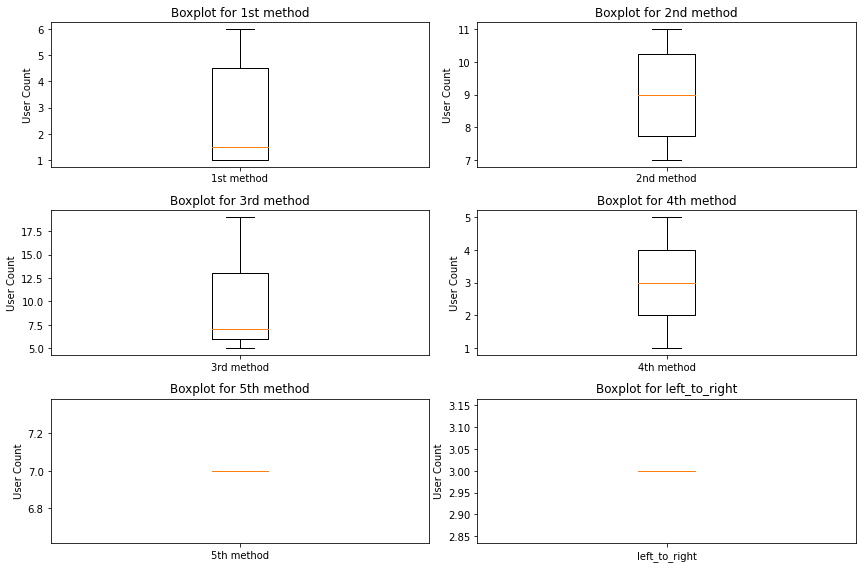

In [8]:
import matplotlib.pyplot as plt

# Get unique methods from the grouped DataFrame
methods = grouped_df['Method'].unique()

# Set the number of rows and columns for the subplots
num_rows = (len(methods) + 1) // 2  # Adjust the number of rows based on the number of methods
num_cols = 2  # Set the number of columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each method and corresponding subplot
for i, (method, ax) in enumerate(zip(methods, axes)):
    # Filter the DataFrame for the current method
    method_data = df[df['Method'] == method]['Count']
    # Generate the boxplot
    ax.boxplot(method_data, labels=[method])
    # Set the title for the subplot
    ax.set_title(f"Boxplot for {method}")
    # Set the y-axis label
    ax.set_ylabel('User Count')

# Remove any extra subplots
if len(methods) < len(axes):
    for j in range(len(methods), len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

